<a href="https://colab.research.google.com/github/ollin-reyes-zamora/EDP/blob/main/Ejercicio_1%20corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1:
$$\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}$$

Condiciones de frontera:
$$u(0,t)=u(1,t)=0, ~~ t>0$$
$$u(x,0)=2x+1\;\;\; 0 < x < 1 $$
Serie de Fourier:
$$ u(x,y) = \sum_{n=1}^{\infty} [1-(-1)^n3]\left(\frac{2}{n\pi}\right)sin(n\pi x)e^{-(n\pi)^2t}$$

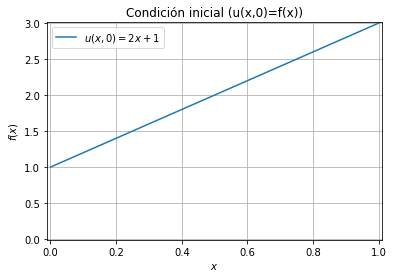

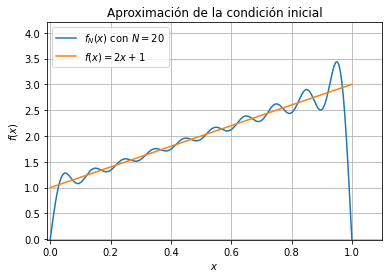

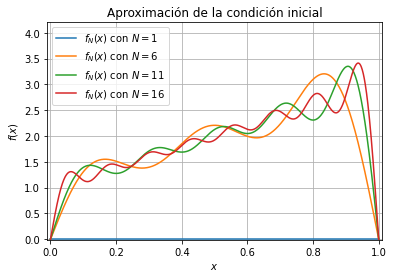

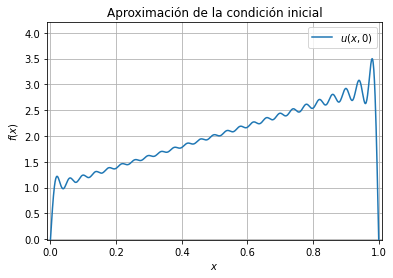

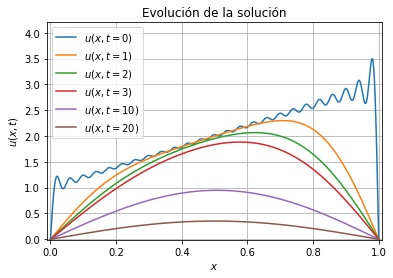

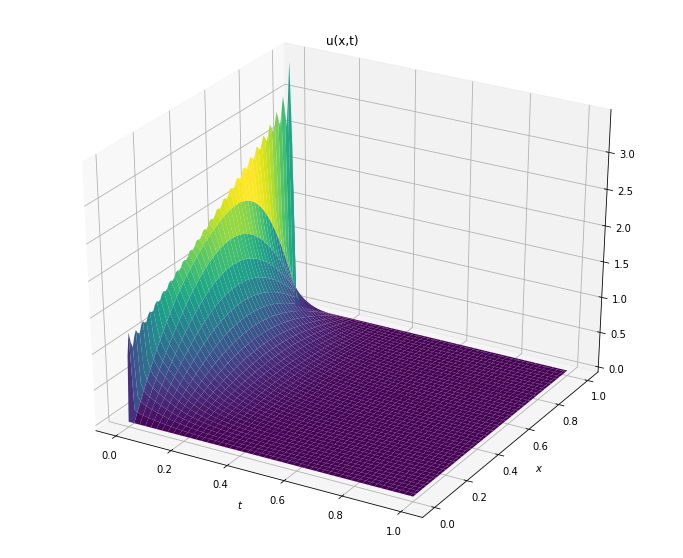

In [ ]:
from pylab import *
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i]+1
    return y
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,3.01]),grid(),legend()
show()
def u_0(x,N=20): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-(-1)**n*3)*sin(n*pi*x)/(n)
    return (2.0/pi)*f
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,4.2]),grid(),legend()
show()
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,4.2]),grid(),legend()
show()
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1-(-1)**n*3)*sin(n*pi*x)/(n)*exp(-(n*pi)**2*t[i])
    return (2.0/pi)*f
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,4.2]),grid(),legend()
show()
plot(x,U[:,0],label='$u(x,t=0)$') 
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,4.2]),grid(),legend()
show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="viridis");